# The Population growth with inter- and intraspecific competition

## Introduction

This tutorial is about simulation: Simulating your own data with a generative model. This is not only convenient if there is no data available, but also helpful to learn analysing your model in the sense, that you can determine the noise in your data: You know where uncertainties come from and we know the *true* process dynamic.
The model we use is simple population growth model, that is based on the logistic growth equation: The Ricker Model (https://en.wikipedia.org/wiki/Ricker_model).
We thus have a process model with complicated behaviour that I extended to versions from which simulate any kind of data:
- Chaotic or non-chaotic
- single-species or multi-species
- dependent on exogeneous factors (Temperature only) or not
- deterministic or stochastic (that refers to fully observable or with observation error, currently)



## The Ricker equation

This is a very simple non-linear difference equation that models the growth of populations with nonoverlapping generations. It can exhibit very complicated behaviour: It has stable equilibrium points, stable cyclic oscillations between two population points and in a certain parameter range exhibits chaotic behaviour. Further, it can easily be extended to environmentally dependent versions or for modeling intra-specific competition.

1. Single-species without environmental dependency

This is the simplest version. It's a discrete-time non-linear dynamic model. We model one variable simply from historic values of the state variable $N$ that is the size of the population. We have a parameter $r$ that is the intrinsic growth rate and a parameter $k$ that is the carrying capacity.
$N_{t+1} =  N_t e^{r(1- \frac{N_t}{k})}$

2. Single-species with environmental dependency

Now, we make the intrinsic growth rate temperature dependent. The temperature $T$ is simulated itself from a sine function with added noise (see utils.py). Now the growth rate $r$ becomes
$r = a + bT + cT^{2}$
giving us the model
$N_{t+1} =  e^{(a + bT + cT^{2})(1 - \frac{N_t}{k})}$.

Parameters are now a, b, c and k.

3. Two-species without environmental dependency

The dynamics of two species, $N1$ and $N2$, that show intra-specific competition can in the discrete version be modelled as follows.
$N1_{t+1} =  N1_t e^{\frac{r_1(k_1- \alpha  N1_t - \beta N2_t)}{k_1}}$
$N2_{t+1} =  N2_t e^{\frac{r_2(k_2- \gamma  N1_t - \delta N2_t)}{k_2}}$

Parameters are $r_1$, $k_1$, $\alpha$, $\beta$ for species 1 and $r_2$, $k_2$, $\gamma$ and $\delta$ for species 2. For a co-existence of the two species, ensuring that none of the two population eventually get extinct, the parameters must fullfill the two conditions:

(1) $A > D > 0$     if $A < 2$
(2) $A > D > 2A-4$  if $A > 2$

Here,
$D = \alpha \delta - \gamma \beta$
and
$A = (\alpha k_2 / r_2 N2*) + (\delta k_1 / r_1 N1*)$
with $N1*$ and $N2*$ as the equilibrium solutions of Equation 5.

4. Two-species with environmental dependency

Equivalently to the ricker 2, we can extend the ricker 3 by modelling the individual growth rates with temperature dependency:
$r_1 = a + bT + cT^{2}$ and
$r_2 = d + eT + fT^{2}$

### Simulations from the Ricker

In a few code files, I implemented the four models with fixed parameters (for default choices see simulations.py) such that it's easy to simulate multiple trajectories, adding different sources of uncertainties:
- process uncertainty ($\sigma$)
- observation uncertainty ($\phi$)
- initial uncertainty ($initialuncertainty$)
- parameters (not implemented yet)

The temporal resolution is weeks, so if you simulate for one year you will get back a timeseries of length 52. The carrying capacity is set to $1$, meaning that we simulate a *relative* population size, relative to the environment. You can generate a simulation with the default values simply through the following code lines:

SIMULATION UNDER THE FOLLOWING CONDITIONS:
Type of Ricker Model that will be used:    single-species
Simulation from Ricker in the following regime:   non-chaotic
Exogeneous impact on state variable considered?    non-exogeneous


/Users/Marieke_Wesselkamp/PycharmProjects/Ricker/models.py:155: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


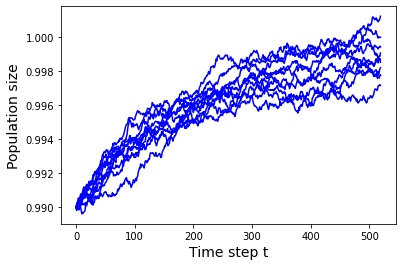

In [15]:
import simulations

sims = simulations.Simulator(model_type="single-species",
                             simulation_regime="non-chaotic",
                             environment="non-exogeneous")
sims.hyper_parameters(simulated_years=10,
                        ensemble_size=10, # trajectories to simulate (initial_uncertainty)
                        initial_size=0.99) # close to carrying capacity
xsim = sims.simulate()

In order to change the default settings for uncertainty simulation, you can change the parameters in the method simulate in the dictionary. Here for example, we add process uncertainty by setting $\sigma$ to a value different than $0$, that is the default:

/Users/Marieke_Wesselkamp/PycharmProjects/Ricker/models.py:155: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


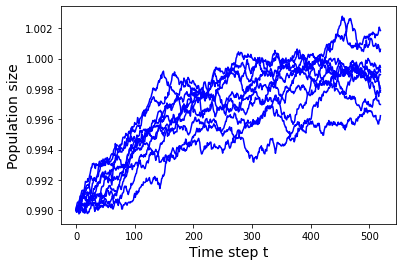

In [16]:
xsim = sims.simulate(pars = {'theta': None,'sigma': 0.0001,'phi': 0.0001,'initial_uncertainty': 1e-5})

Through this, you can easily simulate population growth data in various way. What is missing so far is the implementation of heterogeneous variance: If we have multiple population trajectories, it's very common to model $\sigma$ hierarchically.

## Selected Topics: Overview

This will all be about the calibration of these population models, treating different aspects of it. We will simulate data from a two-species model and fit the single-species model to it first. The second task would be to fit the ricker 3 to the ricker 4, which will involve finding the equilibrium solutions for both populations.

Seltop 1 (Nikola Basar): Detecting the chaotic regime of two-species Ricker models with the Lyapunov-Exponent. Exploring Python packages for Bayesian Model Calibration.

Seltop 2 (...) : Fitting the Ricker as a state space model in Pystan (PyMC3, NumPyro)

Seltop 3 (...) : Towards structured ML - Implementation of a structured loss function in MLP optimization.

Seltop 4 (...) : Data compression for improved calibration of Process model.